Load Job Dataset

In [18]:
import pandas as pd
job = pd.read_csv("job.csv", index_col=0)
job.head(10)

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
5,<35,No,Master,1,Man,No,Dev,9,2,France,38915.0,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,Master,1,Man,No,Dev,26,18,Germany,77831.0,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,Master,1,Man,No,NotDev,14,5,Switzerland,81319.0,C++;Python;Docker;Git,4,0
8,>35,No,Undergraduate,1,Man,No,Dev,39,21,United Kingdom of Great Britain and Northern I...,68507.0,Python;Git;PostgreSQL,3,0
9,>35,No,Master,1,Man,No,Dev,20,16,Russian Federation,37752.0,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


Drop some columns because it doesn't matter in our training

In [19]:
job.drop(columns=["Employment", "Gender", "MainBranch", "Country", "PreviousSalary"], axis=1, inplace=True)
job.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,No,7,4,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,No,12,5,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,No,15,6,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,No,9,6,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,No,40,30,C++;Python,2,0
5,<35,No,Master,No,9,2,JavaScript;Python;Docker;Git;MySQL,5,0
6,>35,No,Master,No,26,18,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17,1
7,<35,No,Master,No,14,5,C++;Python;Docker;Git,4,0
8,>35,No,Undergraduate,No,39,21,Python;Git;PostgreSQL,3,0
9,>35,No,Master,No,20,16,Delphi;Java;SQL;Docker;Git;PostgreSQL,6,0


Separate between feature X and feature Y

In [20]:
df_feature_x = pd.DataFrame(
    [job["Age"], job["Accessibility"], job["EdLevel"], job["MentalHealth"], job["YearsCode"], job["YearsCodePro"], 
    job["HaveWorkedWith"], job["ComputerSkills"]]).transpose()
df_feature_x.head(10)

,Age,Accessibility,EdLevel,MentalHealth,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills
0,<35,No,Master,No,7,4,C++;Python;Git;PostgreSQL,4
1,<35,No,Undergraduate,No,12,5,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12
2,<35,No,Master,No,15,6,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7
3,<35,No,Undergraduate,No,9,6,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13
4,>35,No,PhD,No,40,30,C++;Python,2
5,<35,No,Master,No,9,2,JavaScript;Python;Docker;Git;MySQL,5
6,>35,No,Master,No,26,18,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17
7,<35,No,Master,No,14,5,C++;Python;Docker;Git,4
8,>35,No,Undergraduate,No,39,21,Python;Git;PostgreSQL,3
9,>35,No,Master,No,20,16,Delphi;Java;SQL;Docker;Git;PostgreSQL,6


In [21]:
df_feature_y = pd.DataFrame(job["Employed"])
df_feature_y.head(10)

,Employed
0,0
1,1
2,0
3,0
4,0
5,0
6,1
7,0
8,0
9,0


One-hot Encode some Columns

In [22]:
df_onehot_age = pd.get_dummies(df_feature_x["Age"], prefix="Age")
df_onehot_access = pd.get_dummies(df_feature_x["Accessibility"], prefix="Accessibility")
df_onehot_edlevel = pd.get_dummies(df_feature_x["EdLevel"], prefix="EdLevel")
df_onehot_mental = pd.get_dummies(df_feature_x["MentalHealth"], prefix="MentalHealth")
df_feature_x = pd.concat([df_onehot_age, df_onehot_access, df_onehot_edlevel, df_onehot_mental, df_feature_x], axis=1)
df_feature_x.drop(columns=["Age", "Accessibility", "EdLevel", "MentalHealth"], inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills
0,1,0,1,0,1,0,0,0,0,1,0,7,4,C++;Python;Git;PostgreSQL,4
1,1,0,1,0,0,0,0,0,1,1,0,12,5,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12
2,1,0,1,0,1,0,0,0,0,1,0,15,6,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7
3,1,0,1,0,0,0,0,0,1,1,0,9,6,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13
4,0,1,1,0,0,0,0,1,0,1,0,40,30,C++;Python,2
5,1,0,1,0,1,0,0,0,0,1,0,9,2,JavaScript;Python;Docker;Git;MySQL,5
6,0,1,1,0,1,0,0,0,0,1,0,26,18,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17
7,1,0,1,0,1,0,0,0,0,1,0,14,5,C++;Python;Docker;Git,4
8,0,1,1,0,0,0,0,0,1,1,0,39,21,Python;Git;PostgreSQL,3
9,0,1,1,0,1,0,0,0,0,1,0,20,16,Delphi;Java;SQL;Docker;Git;PostgreSQL,6


Make it so when True=1, False=0 and convert it to Float so it can be use with TensorFlow

In [23]:
columns_to_float = ["Age_<35", "Age_>35", "Accessibility_No", "Accessibility_Yes", "EdLevel_Master", "EdLevel_NoHigherEd",
                   "EdLevel_Other", "EdLevel_PhD", "EdLevel_Undergraduate", "MentalHealth_No", "MentalHealth_Yes"]

for col in columns_to_float:
    df_feature_x[col] = df_feature_x[col].astype(float)

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,7,4,C++;Python;Git;PostgreSQL,4
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,12,5,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,15,6,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9,6,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,40,30,C++;Python,2
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,9,2,JavaScript;Python;Docker;Git;MySQL,5
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26,18,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,17
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,14,5,C++;Python;Docker;Git,4
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,39,21,Python;Git;PostgreSQL,3
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,20,16,Delphi;Java;SQL;Docker;Git;PostgreSQL,6


In [24]:
df_feature_y["Employed"] = df_feature_y["Employed"].astype(float)
df_feature_y.head(10)

,Employed
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
5,0.0
6,1.0
7,0.0
8,0.0
9,0.0


In [25]:
df_feature_x.to_csv("preprocess.csv")

Standardizing YearsCode, YearsCodePro, PreviousSalary, and ComputerSkill

In [26]:
from sklearn.preprocessing import StandardScaler
import numpy as np

norm_scaler = StandardScaler()

years_code = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_feature_x["ComputerSkills"].values.reshape(-1, 1)

data_to_normal = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = norm_scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.767551,-0.640488,C++;Python;Git;PostgreSQL,-1.335861
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.235925,-0.514862,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,-0.202361
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.083050,-0.389236,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,-0.910798
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.554901,-0.389236,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,-0.060674
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2.741180,2.625783,C++;Python,-1.619236
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.554901,-0.891739,JavaScript;Python;Docker;Git;MySQL,-1.194173
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.252628,1.118274,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,0.506076
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.023275,-0.514862,C++;Python;Docker;Git,-1.335861
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.634855,1.495151,Python;Git;PostgreSQL,-1.477548
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.614676,0.867022,Delphi;Java;SQL;Docker;Git;PostgreSQL,-1.052486


MinMaxing YearsCode, YearsCodePro, PreviousSalary, and ComputerSkill between -1 and 1

In [27]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

years_code = df_feature_x["YearsCode"].values.reshape(-1, 1)
years_code_pro = df_feature_x["YearsCodePro"].values.reshape(-1, 1)
comp_skill = df_feature_x["ComputerSkills"].values.reshape(-1, 1)

data_to_minmax = np.column_stack((years_code, years_code_pro, comp_skill))

new_values = scaler.fit_transform(data_to_normal)

df_feature_x["YearsCode"] = new_values[:, 0]
df_feature_x["YearsCodePro"] = new_values[:, 1]
df_feature_x["ComputerSkills"] = new_values[:, 2]

df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,HaveWorkedWith,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,C++;Python;Git;PostgreSQL,-0.925234
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.52,-0.80,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,-0.775701
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.40,-0.76,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,-0.869159
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.64,-0.76,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,-0.757009
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.60,0.20,C++;Python,-0.962617
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.64,-0.92,JavaScript;Python;Docker;Git;MySQL,-0.906542
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04,-0.28,C++;HTML/CSS;Java;JavaScript;Kotlin;Node.js;Ty...,-0.682243
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.44,-0.80,C++;Python;Docker;Git,-0.925234
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.56,-0.16,Python;Git;PostgreSQL,-0.943925
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.20,-0.36,Delphi;Java;SQL;Docker;Git;PostgreSQL,-0.887850


Terpaksa harus di drop dulu yang HaveWorkedWith

In [28]:
df_feature_x.drop(columns=["HaveWorkedWith"], inplace=True)
df_feature_x.head(10)

,Age_<35,Age_>35,Accessibility_No,Accessibility_Yes,EdLevel_Master,EdLevel_NoHigherEd,EdLevel_Other,EdLevel_PhD,EdLevel_Undergraduate,MentalHealth_No,MentalHealth_Yes,YearsCode,YearsCodePro,ComputerSkills
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.52,-0.80,-0.775701
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.40,-0.76,-0.869159
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.64,-0.76,-0.757009
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.60,0.20,-0.962617
5,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.64,-0.92,-0.906542
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.04,-0.28,-0.682243
7,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.44,-0.80,-0.925234
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.56,-0.16,-0.943925
9,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.20,-0.36,-0.887850


Split data into train, validation, and test

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(df_feature_x, df_feature_y, test_size=0.1, random_state=1)


print(f"Data before splitting: {len(df_feature_x)}")
print(f"Train data: {len(X_train)}")
print(f"Validation data: {len(X_valid)}")

Data before splitting: 73462
Train data: 66115
Validation data: 7347


Try to train the model using TensorFlow (Neural Network)

In [30]:
import tensorflow as tf
len_feature = len(df_feature_x.columns)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len_feature,)),
    tf.keras.layers.Dense(16, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(8, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

history = model.fit(X_train, Y_train, epochs=20, validation_data=(X_valid, Y_valid))

2023-11-08 15:55:24.001920: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 15:55:24.002027: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 15:55:24.002062: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 15:55:24.014847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 15:55:28.297567: I tensorflow/compiler/

Epoch 1/20


2023-11-08 15:55:30.843976: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f5e6eb38330 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 15:55:30.844091: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-08 15:55:30.852155: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 15:55:30.882176: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700
2023-11-08 15:55:31.043167: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2067/2067 [==============================] - 28s 12ms/step - loss: 0.6282 - accuracy: 0.6875 - val_loss: 0.5255 - val_accuracy: 0.7803
Epoch 2/20
2067/2067 [==============================] - 25s 12ms/step - loss: 0.5122 - accuracy: 0.7791 - val_loss: 0.5069 - val_accuracy: 0.7726
Epoch 3/20
2067/2067 [==============================] - 24s 12ms/step - loss: 0.5011 - accuracy: 0.7798 - val_loss: 0.4933 - val_accuracy: 0.7814
Epoch 4/20
2067/2067 [==============================] - 25s 12ms/step - loss: 0.4948 - accuracy: 0.7800 - val_loss: 0.4886 - val_accuracy: 0.7836
Epoch 5/20
2067/2067 [==============================] - 25s 12ms/step - loss: 0.4908 - accuracy: 0.7796 - val_loss: 0.4851 - val_accuracy: 0.7870
Epoch 6/20
2067/2067 [==============================] - 24s 12ms/step - loss: 0.4879 - accuracy: 0.7785 - val_loss: 0.4831 - val_accuracy: 0.7854
Epoch 7/20
2067/2067 [==============================] - 24s 12ms/step - loss: 0.4853 - accuracy: 0.7787 - val_loss: 0.4806 - val_accura

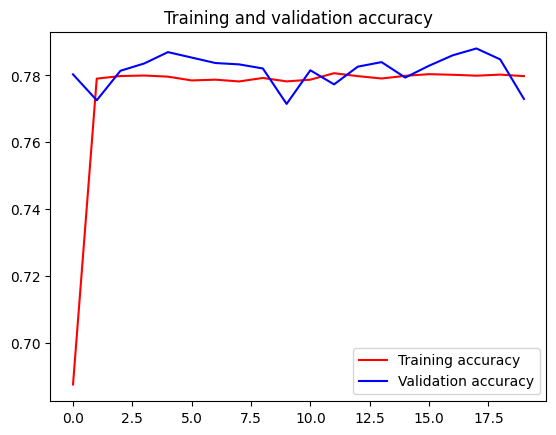

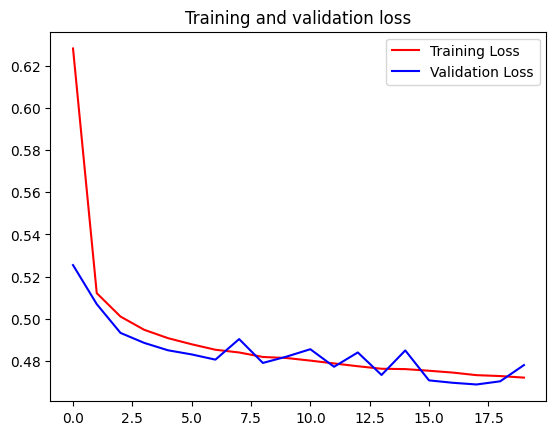

In [31]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
model.predict([[1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.72,-0.84,-0.925234]])

1/1 [==============================] - 0s 212ms/step


array([[0.96339434, 0.03660566]], dtype=float32)